In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [23]:
#Loading data

df = pd.read_csv('heart_disease_uci.csv')

print(df.head())
print(df.info())
print(df.describe())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

In [24]:
#Removing unnecessary columns
df.drop(["id", "dataset"], axis=1, inplace=True)

In [25]:
# Converting text values ​​to numeric values
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["fbs"] = df["fbs"].map({True: 1, False: 0})
df["exang"] = df["exang"].map({True: 1, False: 0})

In [26]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=["cp", "restecg", "slope", "thal"], drop_first=True)

In [27]:
# Filling in missing values ​​with the median
imputer = SimpleImputer(strategy="median")
df[df.columns] = imputer.fit_transform(df)

print(df.isnull().sum().sum())

0


In [28]:
#Splitting the data into training and test sets

X = df.drop("num", axis=1)
y = df["num"]


y = (y > 0).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [29]:
#Data normalization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
# Create model - random forest


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.84      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



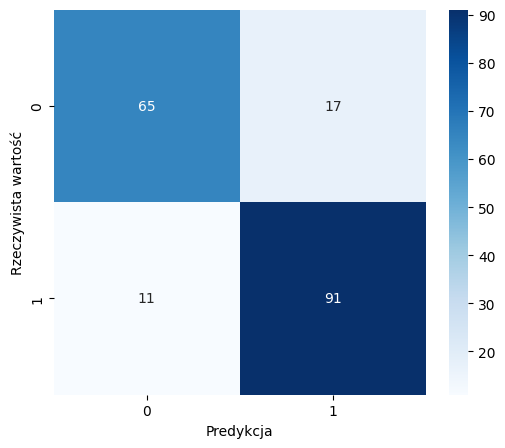

In [31]:
#Wizualization


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista wartość")
plt.show()


In [32]:
# Create model -regression logistics




logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)


y_pred_logreg = logreg.predict(X_test)


print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Accuracy (Logistic Regression): 0.8369565217391305
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        82
           1       0.83      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [33]:
#Create model - KNN



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)


print("Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Accuracy (KNN): 0.8315217391304348
              precision    recall  f1-score   support

           0       0.86      0.74      0.80        82
           1       0.81      0.90      0.86       102

    accuracy                           0.83       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



In [34]:
# Create model - SVM



svm = SVC(random_state=42)
svm.fit(X_train, y_train)


y_pred_svm = svm.predict(X_test)


print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy (SVM): 0.842391304347826
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        82
           1       0.81      0.93      0.87       102

    accuracy                           0.84       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.85      0.84      0.84       184



In [35]:
# Create model - XGBoost




xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Accuracy (XGBoost): 0.8369565217391305
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [36]:
# Create model - decision tree




dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy (Decision Tree): 0.7880434782608695
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        82
           1       0.79      0.84      0.82       102

    accuracy                           0.79       184
   macro avg       0.79      0.78      0.78       184
weighted avg       0.79      0.79      0.79       184



In [37]:
#Create model - neural network



mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)


y_pred_mlp = mlp.predict(X_test)

print("Accuracy (MLP Neural Network):", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Accuracy (MLP Neural Network): 0.842391304347826
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



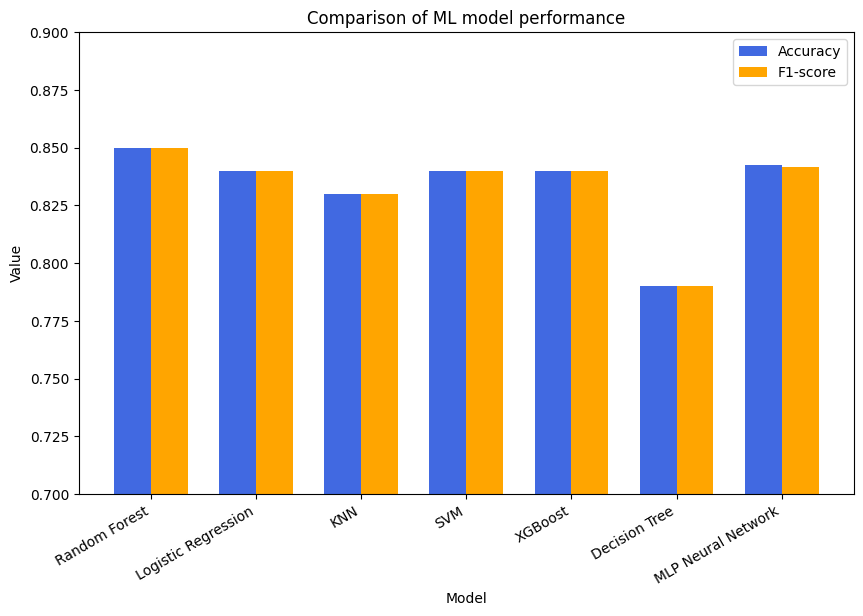

In [38]:
# F1 score comparison for all models




models = {
    "Random Forest": [0.85, 0.85],
    "Logistic Regression": [0.84, 0.84],
    "KNN": [0.83, 0.83],
    "SVM": [0.84, 0.84],
    "XGBoost": [0.84, 0.84],
    "Decision Tree": [0.79, 0.79],
    "MLP Neural Network": [accuracy_score(y_test, y_pred_mlp),
                           classification_report(y_test, y_pred_mlp, output_dict=True)["weighted avg"]["f1-score"]]
}


model_names = list(models.keys())
accuracies = [models[m][0] for m in model_names]
f1_scores = [models[m][1] for m in model_names]


bar_width = 0.35
x = np.arange(len(model_names))


plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, accuracies, bar_width, label="Accuracy", color="royalblue")
plt.bar(x + bar_width/2, f1_scores, bar_width, label="F1-score", color="orange")


plt.xlabel("Model")
plt.ylabel("Value")
plt.title("Comparison of ML model performance")
plt.xticks(ticks=x, labels=model_names, rotation=30, ha="right")
plt.legend()
plt.ylim(0.7, 0.9)


plt.show()


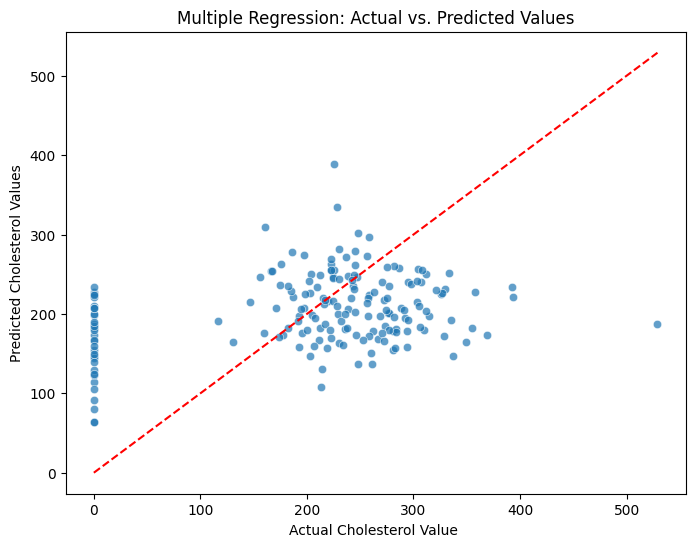

MAE: 82.53, RMSE: 103.51


In [39]:
#Multiple Linear Regression



X_reg = df.drop(columns=["chol", "num"])
y_reg = df["chol"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_reg)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r', linestyle="--")
plt.xlabel("Actual Cholesterol Value ")
plt.ylabel("Predicted Cholesterol Values")
plt.title("Multiple Regression: Actual vs. Predicted Values")
plt.show()


mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE (Polynomial Regression): 0.29
RMSE (Polynomial Regression): 0.40


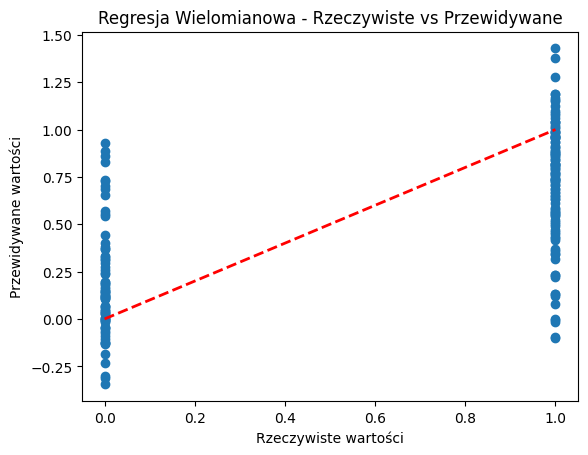

In [ ]:


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)


y_pred_poly = model_poly.predict(X_test_poly)


mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"MAE (Polynomial Regression): {mae_poly:.2f}")
print(f"RMSE (Polynomial Regression): {rmse_poly:.2f}")


plt.scatter(y_test, y_pred_poly)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Expected values')
plt.title('Polynomial Regression - Actual vs. Predicted')
plt.show()
